In [26]:
import pandas as pd
df= pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')

C:\Users\hnwong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [28]:
new = df['Race and ethnicity (combined)'].str.split(",",n=1,expand=True)

In [29]:
df['Race']=new[0]
df['Ethnicity']=new[1]

In [30]:
df.drop(columns='Race and ethnicity (combined)',inplace=True)

In [31]:
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race,Ethnicity
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black,Non-Hispanic
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black,Non-Hispanic
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black,Non-Hispanic
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black,Non-Hispanic
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black,Non-Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown,None
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown,None


In [32]:
df.shape

(8405079, 12)

In [33]:
df.isnull().sum()

cdc_report_dt           0
pos_spec_dt       5534290
onset_dt          4009122
current_status          0
sex                    18
age_group              89
hosp_yn                 0
icu_yn                  0
death_yn                0
medcond_yn              0
Race                    7
Ethnicity         4578441
dtype: int64

In [34]:
df=df.drop(['pos_spec_dt','onset_dt','Ethnicity'],axis=1)

In [35]:
df=df.dropna()

In [36]:
df

,cdc_report_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown
8405075,2020/10/25,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405076,2020/07/18,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405077,2020/11/19,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown


In [37]:
df.shape

(8404990, 9)

In [38]:
df.groupby(['age_group']).count()

,cdc_report_dt,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,Race
age_group,,,,,,,,
0 - 9 Years,299040,299040,299040,299040,299040,299040,299040,299040
10 - 19 Years,841450,841450,841450,841450,841450,841450,841450,841450
20 - 29 Years,1635264,1635264,1635264,1635264,1635264,1635264,1635264,1635264
30 - 39 Years,1372623,1372623,1372623,1372623,1372623,1372623,1372623,1372623
40 - 49 Years,1267350,1267350,1267350,1267350,1267350,1267350,1267350,1267350
50 - 59 Years,1227493,1227493,1227493,1227493,1227493,1227493,1227493,1227493
60 - 69 Years,863260,863260,863260,863260,863260,863260,863260,863260
70 - 79 Years,483689,483689,483689,483689,483689,483689,483689,483689
80+ Years,382869,382869,382869,382869,382869,382869,382869,382869


In [39]:
df.describe().T

,count,unique,top,freq
cdc_report_dt,8404990,321,2020/06/24,155856
current_status,8404990,2,Laboratory-confirmed case,7910037
sex,8404990,5,Female,4340898
age_group,8404990,10,20 - 29 Years,1635264
hosp_yn,8404990,4,No,3502508
icu_yn,8404990,4,Missing,6178240
death_yn,8404990,4,No,3690765
medcond_yn,8404990,4,Missing,6063360
Race,8404990,9,Unknown,2781165


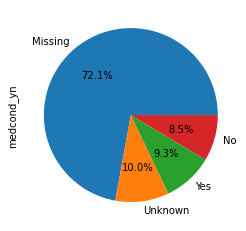

In [43]:
df['medcond_yn'].value_counts().plot.pie(autopct="%1.1f%%")

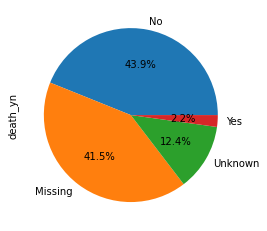

In [44]:
df['death_yn'].value_counts().plot.pie(autopct="%1.1f%%")

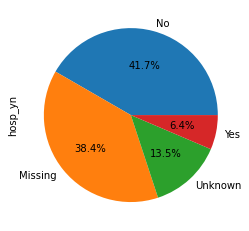

In [45]:
df['hosp_yn'].value_counts().plot.pie(autopct="%1.1f%%")

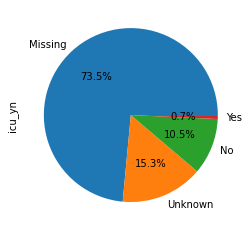

In [46]:
df['icu_yn'].value_counts().plot.pie(autopct="%1.1f%%")

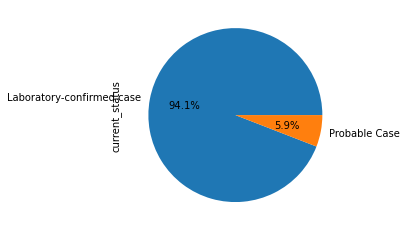

In [48]:
df['current_status'].value_counts().plot.pie(autopct="%1.1f%%")

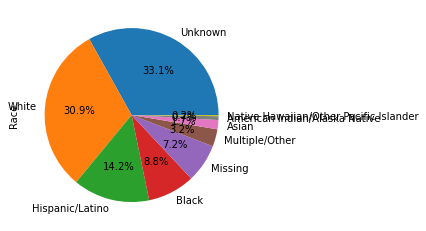

In [49]:
df['Race'].value_counts().plot.pie(autopct="%1.1f%%")

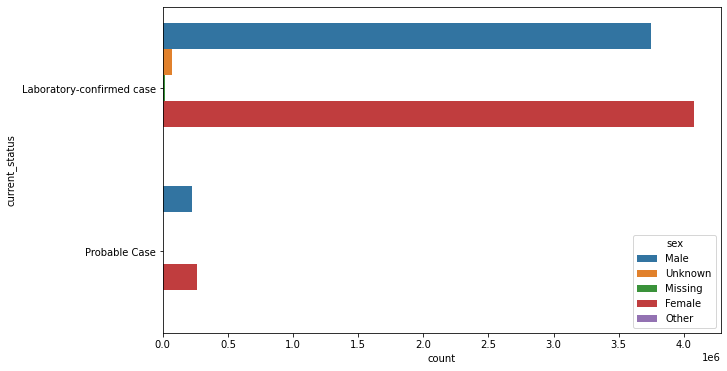

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(y="current_status",hue ='sex',data=df)

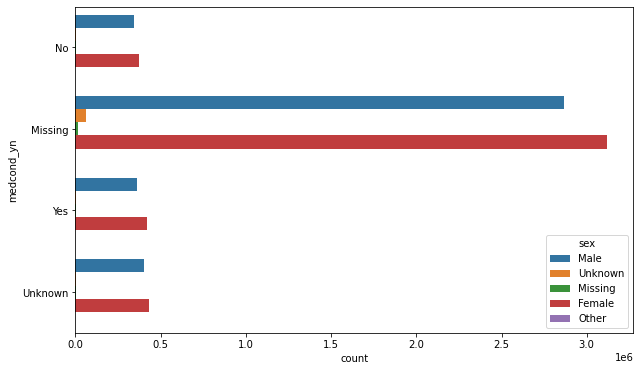

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(y="medcond_yn",hue ='sex',data=df)

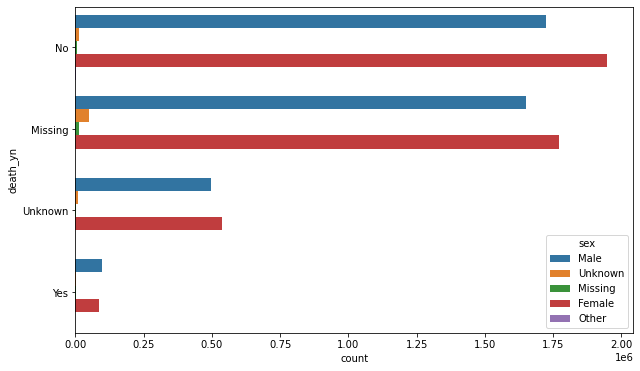

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(y="death_yn",hue ='sex',data=df)

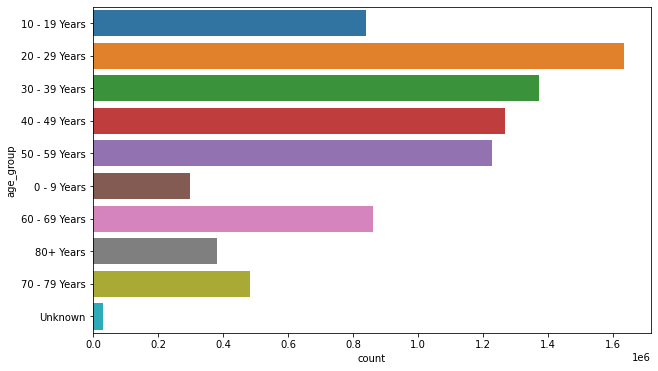

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(y="age_group",data=df)

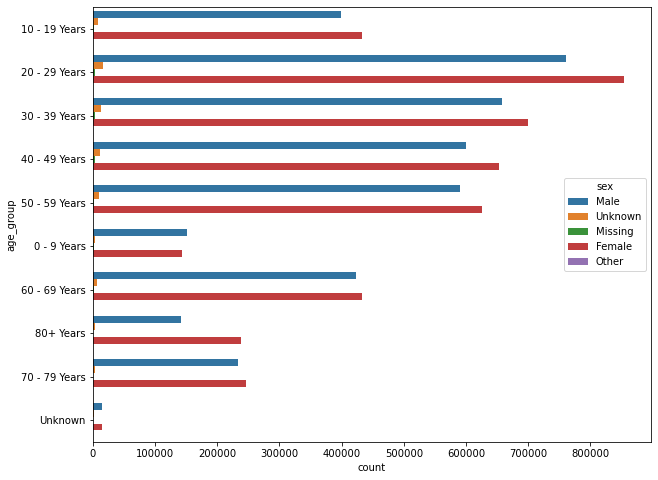

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(y="age_group",hue ='sex',data=df)

In [59]:
df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

## Data Preparation

In [60]:
data=df.copy()

In [61]:
data['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404990 entries, 0 to 8405078
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   cdc_report_dt   object
 1   current_status  object
 2   sex             object
 3   age_group       object
 4   hosp_yn         object
 5   icu_yn          object
 6   death_yn        object
 7   medcond_yn      object
 8   Race            object
dtypes: object(9)
memory usage: 641.2+ MB


In [66]:
data.drop(['cdc_report_dt'],axis=1,inplace=True)

In [67]:
data

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race
0,Laboratory-confirmed case,Male,10 - 19 Years,No,Unknown,No,No,Black
1,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
2,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,No,Black
3,Laboratory-confirmed case,Male,10 - 19 Years,Missing,Missing,No,Missing,Black
4,Laboratory-confirmed case,Male,10 - 19 Years,No,No,No,Yes,Black
...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,No,Unknown,No,Missing,Unknown
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Missing,Missing,Missing,Missing,Unknown


In [68]:
from pycaret.classification import *
classification = setup(data=data,target='death_yn',train_size=0.8)

,Description,Value
0,session_id,5830
1,Target,death_yn
2,Target Type,Multiclass
3,Label Encoded,"Missing: 0, No: 1, Unknown: 2, Yes: 3"
4,Original Data,"(8404990, 8)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best=compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:38:08
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
